In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon 
    
import seaborn as sns

from scipy import stats
from scipy.stats import randint

# prep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score
#Neural Network
from sklearn.neural_network import MLPClassifier
#from sklearn import grid_search
#from grid_search import RandomizedSearchCV

#Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Naive bayes
#from sklearn.naive_bayes import GaussianNB 

#Stacking
#from mlxtend.classifier import StackingClassifier

#reading in CSV's from a file path
train_df = pd.read_csv('survey.csv')


#Pandas: whats the data row count?
print(train_df.shape)
    
#Pandas: whats the distribution of the data?
print(train_df.describe())
    
#Pandas: What types of data do i have?
print(train_df.info())

(1259, 27)
                Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-n

In [2]:
#dealing with missing data
#Let’s get rid of the variables "Timestamp",“comments”, “state”.
train_df = train_df.drop(['comments'], axis= 1)
train_df = train_df.drop(['state'], axis= 1)
train_df = train_df.drop(['Timestamp'], axis= 1)

train_df.isnull().sum().max() #just checking that there's no missing data missing...
train_df.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [3]:
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

# Create lists by data tpe
intFeatures = ['Age']
stringFeatures = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help']
floatFeatures = []
# Clean the NaN's
for feature in train_df:
    if feature in intFeatures:
        train_df[feature] = train_df[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        train_df[feature] = train_df[feature].fillna(defaultString)
    elif feature in floatFeatures:
        train_df[feature] = train_df[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not recognized.' % feature)
train_df.head(5)  

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [4]:
#clean 'Gender'
gender = train_df['Gender'].str.lower()

#Select unique elements
gender = train_df['Gender'].unique()

#Made gender groups
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (row, col) in train_df.iterrows():

    if str.lower(col.Gender) in male_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans_str:
         train_df['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

stk_list = ['A little about you', 'p']
train_df = train_df[~train_df['Gender'].isin(stk_list)]

print(train_df['Gender'].unique())

['female' 'male' 'trans']


In [5]:
#complete missing age with mean
train_df['Age'].fillna(train_df['Age'].median(), inplace = True)

# Fill with media() values < 18 and > 120
s = pd.Series(train_df['Age'])
s[s<18] = train_df['Age'].median()
train_df['Age'] = s
s = pd.Series(train_df['Age'])
s[s>120] = train_df['Age'].median()
train_df['Age'] = s

#Ranges of Age
train_df['age_range'] = pd.cut(train_df['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)

In [6]:
#Replace "NaN" string from defaultString
train_df['self_employed'] = train_df['self_employed'].replace([defaultString], 'No')
print(train_df['self_employed'].unique())


['No' 'Yes']


In [7]:
#Replace "NaN" string from defaultString

train_df['work_interfere'] = train_df['work_interfere'].replace([defaultString], 'Don\'t know' )
print(train_df['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


In [8]:
#Encoding data
labelDict = {}
for feature in train_df:
    le = preprocessing.LabelEncoder()
    le.fit(train_df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    train_df[feature] = le.transform(train_df[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)
#Get rid of 'Country'
train_df = train_df.drop(['Country'], axis= 1)
train_df.head()

label_Age [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72]
label_Gender ['female', 'male', 'trans']
label_Country ['Australia', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Singapore', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'United Kingdom', 'United States', 'Uruguay', 'Zimbabwe']
label_self_employed ['No', 'Yes']
label_family_history ['No', 'Yes']
label_treatment ['No', 'Yes']
label_work_interfere ["Don't know", 'Never', 'Often', 'Rarely', 'Sometimes']
label_no_emp

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,19,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,26,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,14,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,13,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,13,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2


In [9]:
#missing data
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total  Percent
age_range                      0      0.0
obs_consequence                0      0.0
Gender                         0      0.0
self_employed                  0      0.0
family_history                 0      0.0
treatment                      0      0.0
work_interfere                 0      0.0
no_employees                   0      0.0
remote_work                    0      0.0
tech_company                   0      0.0
benefits                       0      0.0
care_options                   0      0.0
wellness_program               0      0.0
seek_help                      0      0.0
anonymity                      0      0.0
leave                          0      0.0
mental_health_consequence      0      0.0
phys_health_consequence        0      0.0
coworkers                      0      0.0
supervisor                     0      0.0
mental_health_interview        0      0.0
phys_health_interview          0      0.0
mental_vs_physical             0  

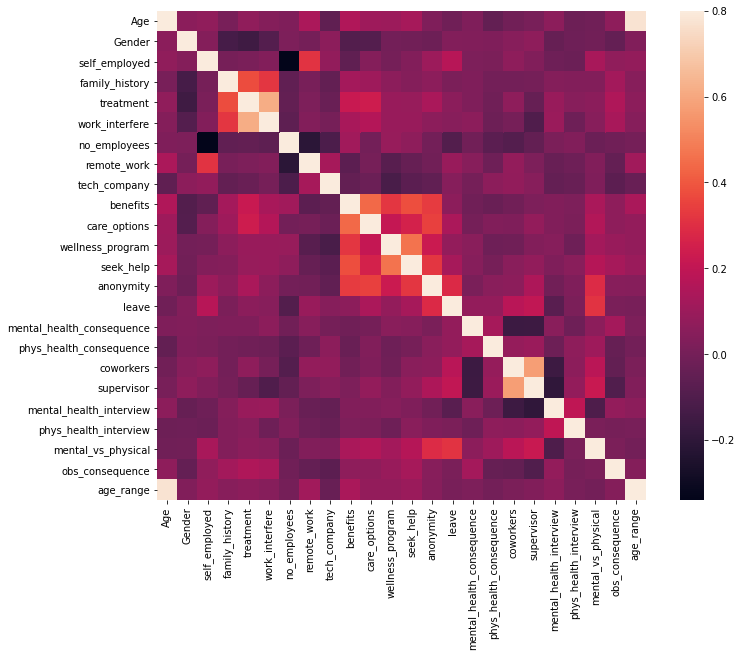

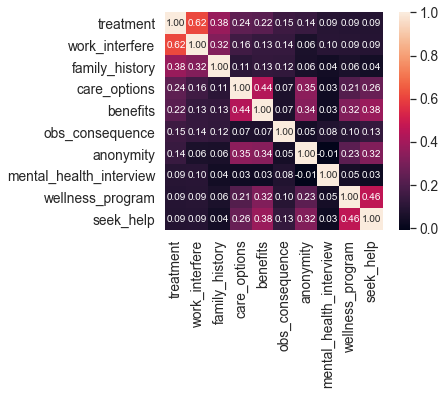

In [10]:
#correlation matrix
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

#treatment correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Text(0.5, 0, 'Age')

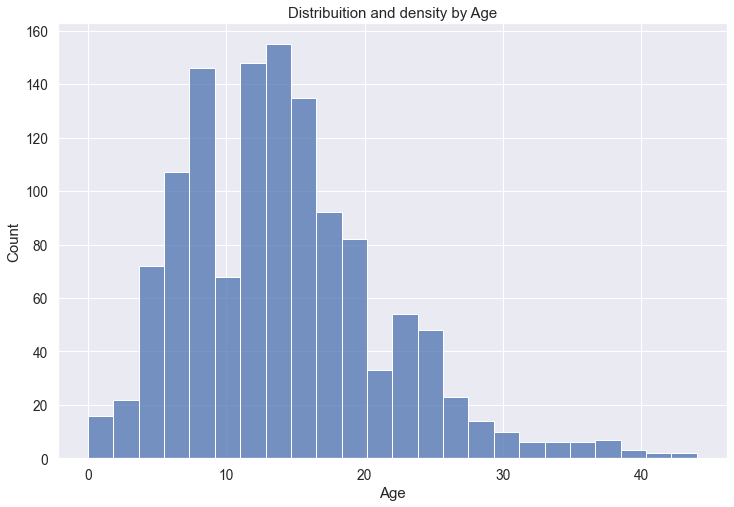

In [11]:
# Distribiution and density by Age
plt.figure(figsize=(12,8))
sns.histplot(train_df["Age"], bins=24)
plt.title("Distribuition and density by Age")
plt.xlabel("Age")

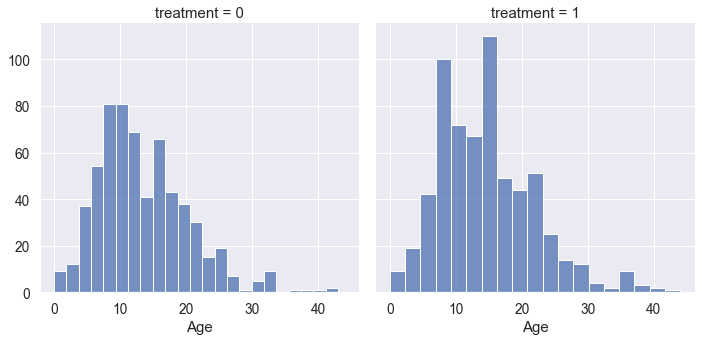

In [12]:
 #Separate by treatment or not

g = sns.FacetGrid(train_df, col='treatment', height=5)
g = g.map(sns.histplot, "Age")

Text(0.5, 1.0, 'Total Distribuition by treated or not')

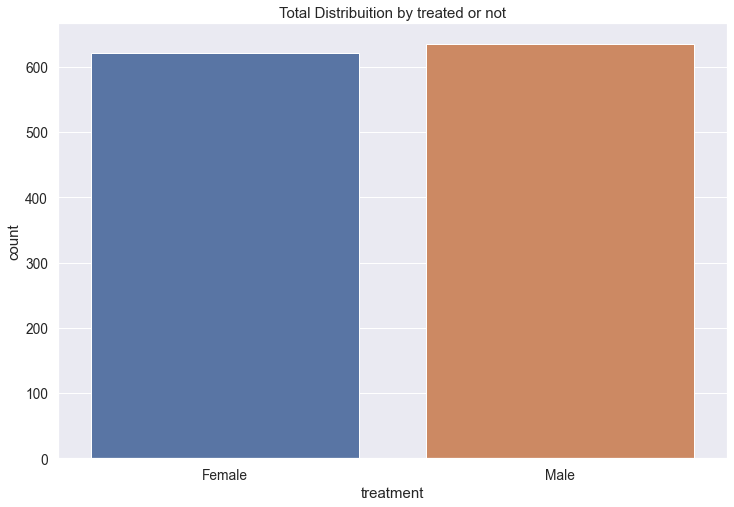

In [13]:
# Let see how many people has been treated
plt.figure(figsize=(12,8))
labels = labelDict['label_Gender']
g = sns.countplot(x="treatment", data=train_df)
g.set_xticklabels(['Female','Male'])
plt.title('Total Distribuition by treated or not')

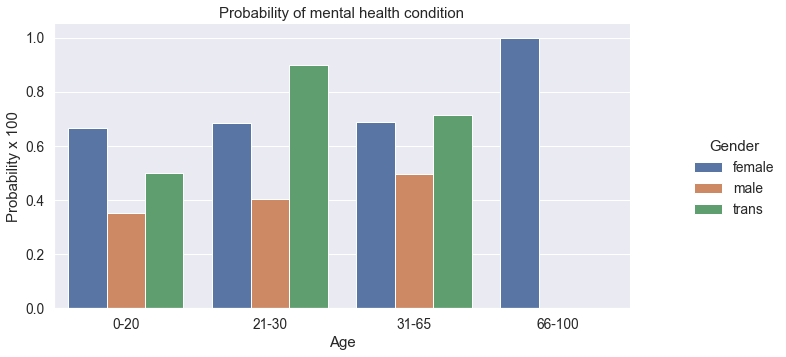

In [14]:
o = labelDict['label_age_range']

g = sns.catplot(x="age_range", y="treatment", hue="Gender", data=train_df, kind="bar",  ci=None, height=5, aspect=2, legend_out = True)
g.set_xticklabels(o)

plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Age')
# replace legend labels

new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)

plt.show()

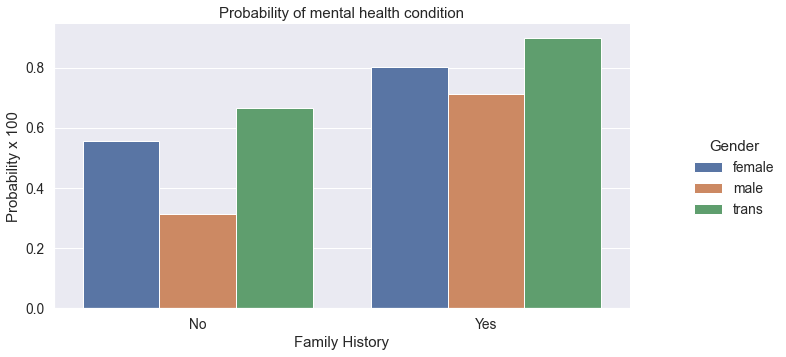

In [15]:
o = labelDict['label_family_history']
g = sns.catplot(x="family_history", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, height=5, aspect=2, legend_out = True)
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Family History')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)

plt.show()

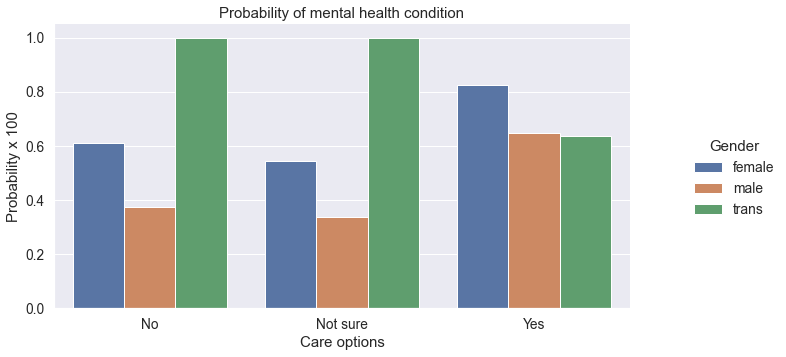

In [16]:
o = labelDict['label_care_options']
g = sns.catplot(x="care_options", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, height=5, aspect=2, legend_out = True)
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Care options')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

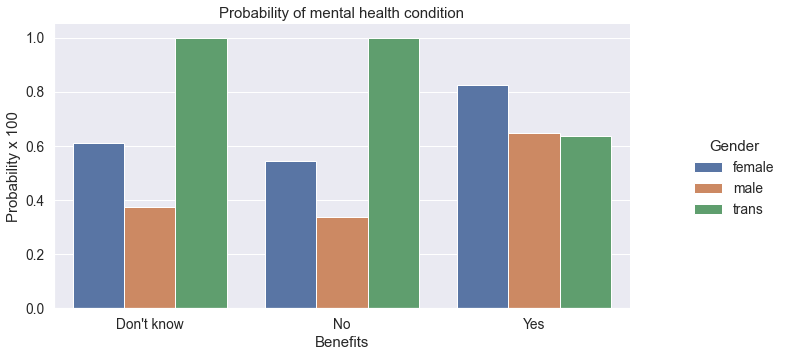

In [17]:
o = labelDict['label_benefits']
g = sns.catplot(x="care_options", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, height=5, aspect=2, legend_out = True)
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Benefits')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

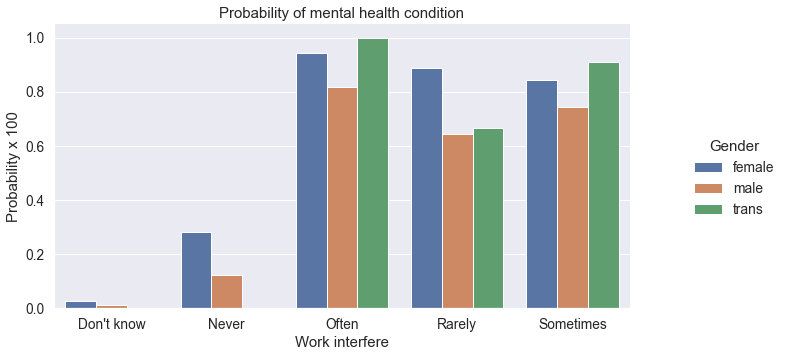

In [18]:
o = labelDict['label_work_interfere']
g = sns.catplot(x="work_interfere", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, height=5, aspect=2, legend_out = True)
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Work interfere')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

In [19]:
scaler = MinMaxScaler()
train_df['Age'] = scaler.fit_transform(train_df[['Age']])
train_df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,0.431818,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,0.590909,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,0.318182,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,0.295455,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,0.295455,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2


In [20]:
feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
X = train_df[feature_cols]
y = train_df.treatment

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

methodDict = {}
rmseDict = ()

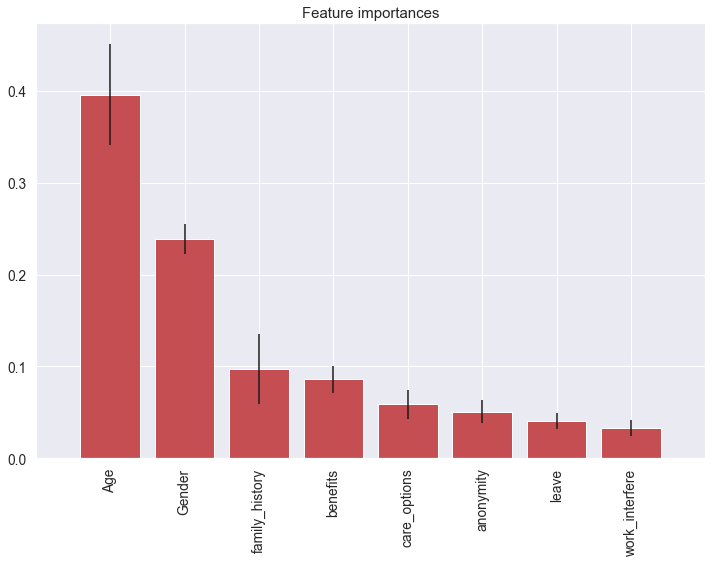

In [21]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

labels = []
for f in range(X.shape[1]):
    labels.append(feature_cols[f])      
    
# Plot the feature importances of the forest
plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), labels, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

In [22]:
def evalClassModel(model, y_test, y_pred_class, plot=False):
    #Classification accuracy: percentage of correct predictions
    # calculate accuracy
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred_class))
    
    #Confusion matrix
    # save confusion matrix and slice into four pieces
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    
    # visualize Confusion Matrix
    sns.heatmap(confusion,annot=True,fmt="d") 
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    #Metrics computed from a confusion matrix
    #Classification Accuracy: Overall, how often is the classifier correct?
    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print('Classification Accuracy:', accuracy)
    #Classification Error: Overall, how often is the classifier incorrect?
    print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_class)) 

In [23]:
def logisticRegression():
    # train a logistic regression model on the training set
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = logreg.predict(X_test)
    
    print('########### Logistic Regression ###############')
    
    accuracy_score = evalClassModel(logreg, y_test, y_pred_class, True)    

########### Logistic Regression ###############
Accuracy: 0.7962962962962963


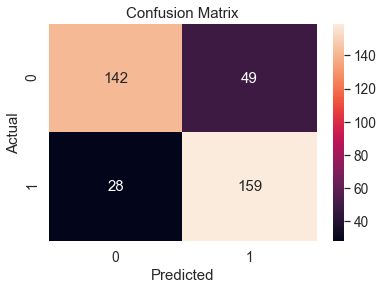

Classification Accuracy: 0.7962962962962963
Classification Error: 0.20370370370370372


In [24]:
logisticRegression()

In [25]:
def treeClassifier():
    # Calculating the best parameters
    tree = DecisionTreeClassifier()
    # train a decision tree model on the training set
    tree = DecisionTreeClassifier(max_depth=3, min_samples_split=8, max_features=6, criterion='entropy', min_samples_leaf=7)
    tree.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = tree.predict(X_test)
    
    print('########### Tree classifier ###############')
    
    accuracy_score = evalClassModel(tree, y_test, y_pred_class, True)


########### Tree classifier ###############
Accuracy: 0.8068783068783069


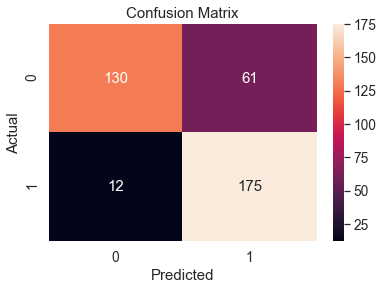

Classification Accuracy: 0.8068783068783069
Classification Error: 0.19312169312169314


In [26]:
treeClassifier()

In [27]:
def Knn():
    # Calculating the best parameters
    knn = KNeighborsClassifier(n_neighbors=5)
    
    
    # train a KNeighborsClassifier model on the training set
    knn = KNeighborsClassifier(n_neighbors=27, weights='uniform')
    knn.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = knn.predict(X_test)
    
    print('########### KNeighborsClassifier ###############')
    
    accuracy_score = evalClassModel(knn, y_test, y_pred_class, True)

########### KNeighborsClassifier ###############
Accuracy: 0.8042328042328042


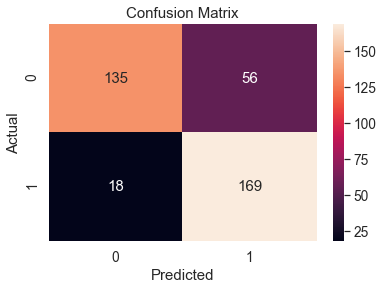

Classification Accuracy: 0.8042328042328042
Classification Error: 0.1957671957671958


In [28]:
Knn()

########### Boosting ###############
Accuracy: 0.8174603174603174


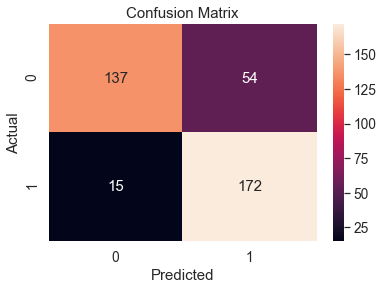

Classification Accuracy: 0.8174603174603174
Classification Error: 0.18253968253968256


In [29]:
    # Building and fitting 
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)
    boost = AdaBoostClassifier(base_estimator=clf, n_estimators=500)
    boost.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = boost.predict(X_test)
    
    print('########### Boosting ###############')
    
    accuracy_score = evalClassModel(boost, y_test, y_pred_class, True)

In [30]:
# Generate predictions with the best method
clf = AdaBoostClassifier()
clf.fit(X, y)
dfTestPredictions = clf.predict(X_test)

# Write predictions to csv file
results = pd.DataFrame({'Index': X_test.index, 'Treatment': dfTestPredictions})
# Save to file
# This file will be visible after publishing in the output section
results.to_csv('results1.csv', index=False)
results.head()

,Index,Treatment
0,5,1
1,494,0
2,52,0
3,984,0
4,186,0


In [31]:
df = pd.read_csv("Suicides in India 2001-2012.csv")

In [32]:
df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [33]:
df_suicide = df.loc[(df['Total'] != 0) & (~df['State'].isin(["Total (All India)", "Total (States)", "Total (Uts)"]))]
df_no_suicide = df.loc[(df['Total'] == 0) & (~df['State'].isin(["Total (All India)", "Total (States)", "Total (Uts)"]))]

In [34]:
df_suicide_state = df_suicide.loc[~df_suicide['State'].isin(["A & N Islands", "Chandigarh", "D & N Haveli", "Daman & Diu", "Delhi (Ut)", "Lakshadweep", "Puducherry"])]

In [35]:
df_suicide_state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91694 entries, 6713 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   State      91694 non-null  object
 1   Year       91694 non-null  int64 
 2   Type_code  91694 non-null  object
 3   Type       91694 non-null  object
 4   Gender     91694 non-null  object
 5   Age_group  91694 non-null  object
 6   Total      91694 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 5.6+ MB


Text(0.5, 1.0, 'Suicide Distribution by State')

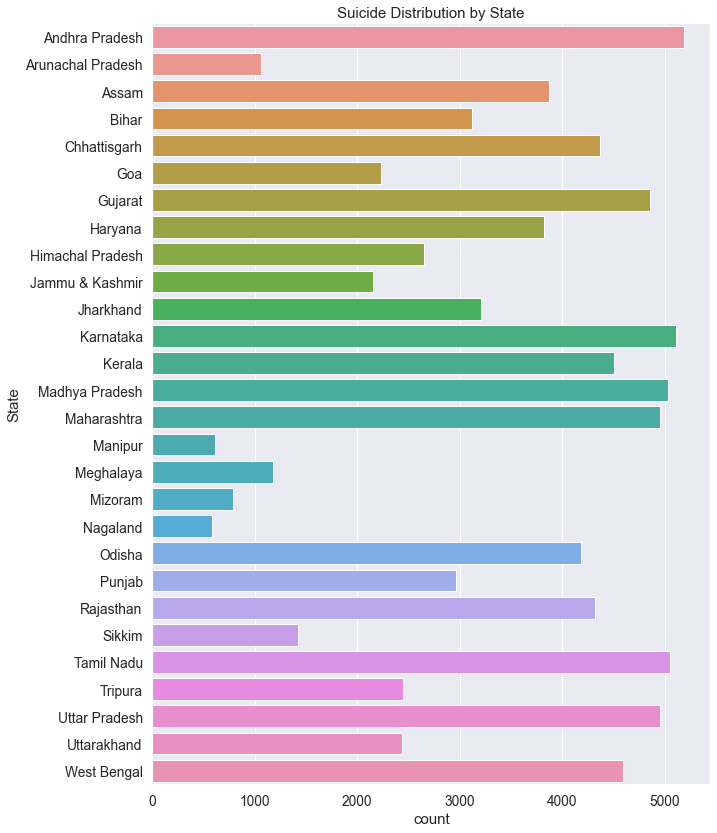

In [36]:
plt.subplots(figsize=(10,14))
sns.countplot(y= "State",data = df_suicide_state).set_title("Suicide Distribution by State")

Text(0.5, 1.0, 'Gender Suicide Distribution by State')

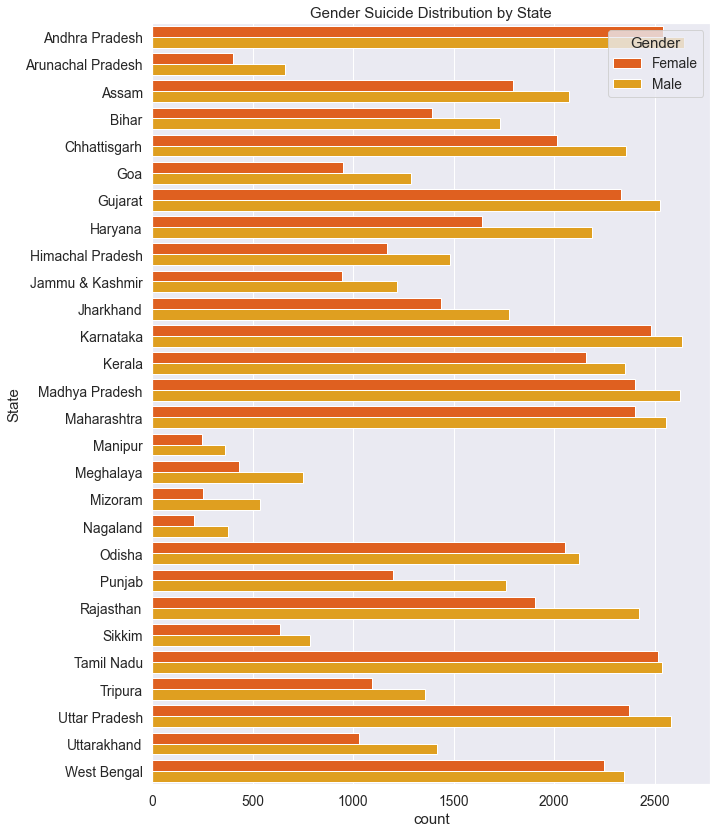

In [37]:
plt.subplots(figsize=(10,14))
sns.countplot(y= "State", hue= "Gender" ,data = df_suicide_state, palette= "autumn").set_title("Gender Suicide Distribution by State")

Text(0.5, 1.0, 'State Suicide Distribution by Age-Group')

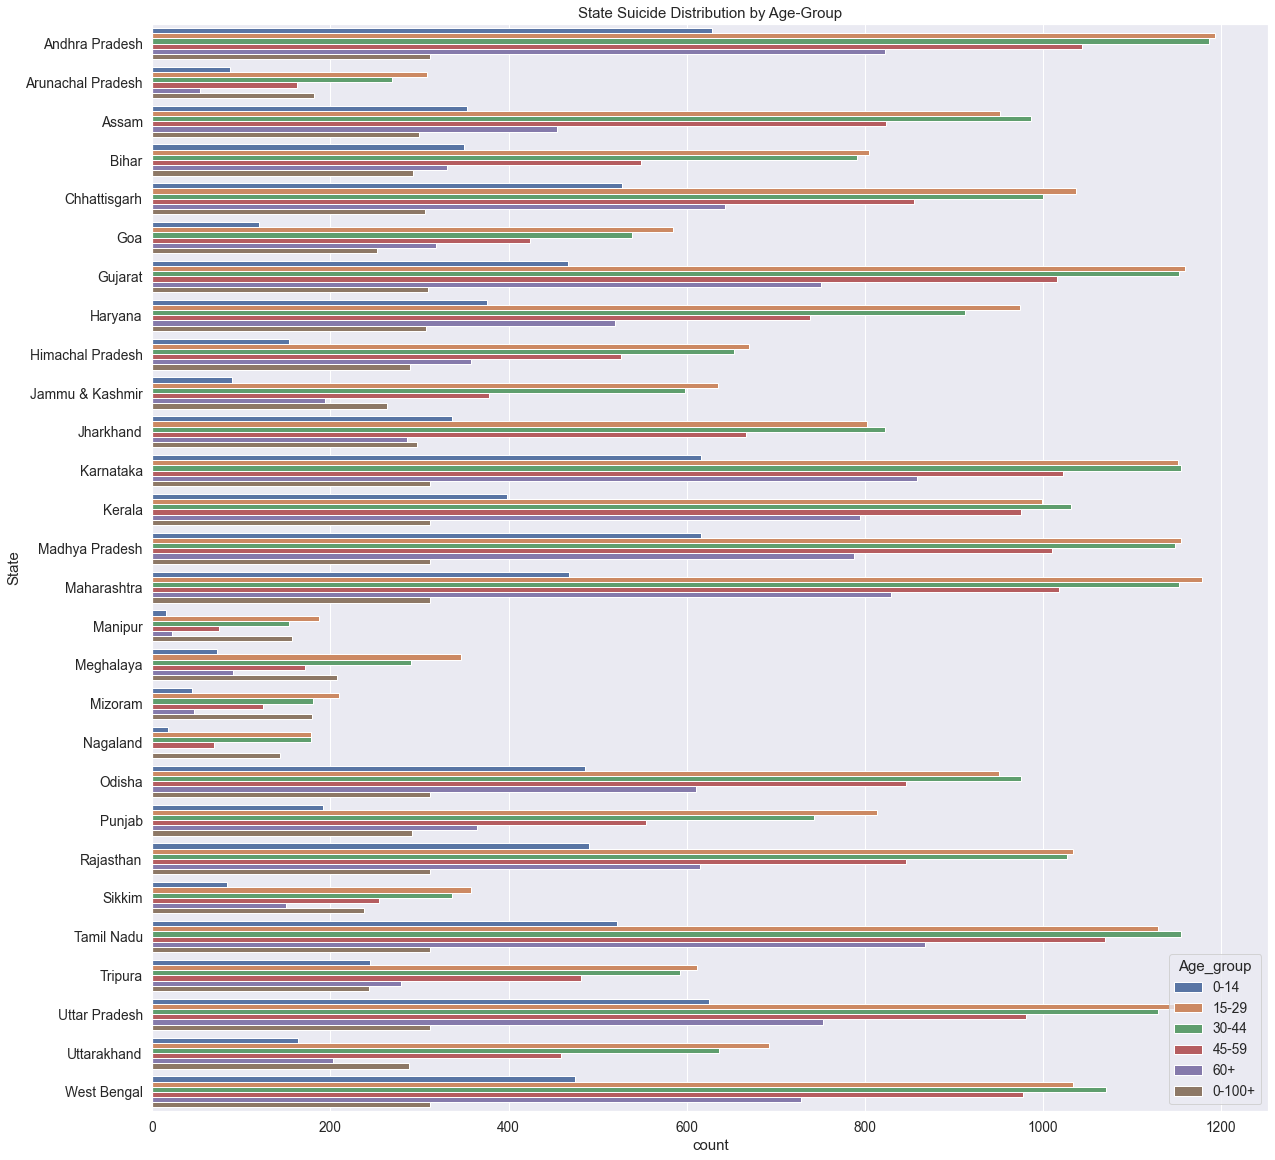

In [38]:
plt.subplots(figsize=(20,20))
sns.countplot(y= "State", hue= "Age_group" ,data = df_suicide_state).set_title("State Suicide Distribution by Age-Group")

Male      49454
Female    42240
Name: Gender, dtype: int64


Text(0.5, 1.0, 'Gender Suicide Distribution of State')

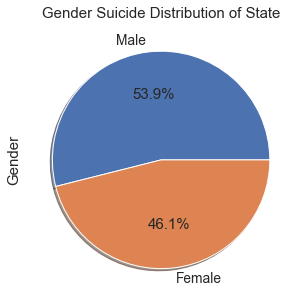

In [39]:
print(df_suicide_state.Gender.value_counts())
df_suicide_state.Gender.value_counts().plot(kind= "pie", autopct='%1.1f%%', shadow=True, figsize=(5,5))
plt.title("Gender Suicide Distribution of State")

Text(0.5, 1.0, 'Gender Suicide Distribution of State by Age-Group')

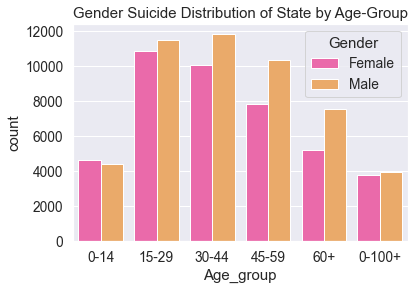

In [40]:
sns.countplot(x = "Age_group", hue= "Gender", data= df_suicide_state, palette= "spring").set_title("Gender Suicide Distribution of State by Age-Group")

Text(0.5, 1.0, 'Year Suicide Distribution of State')

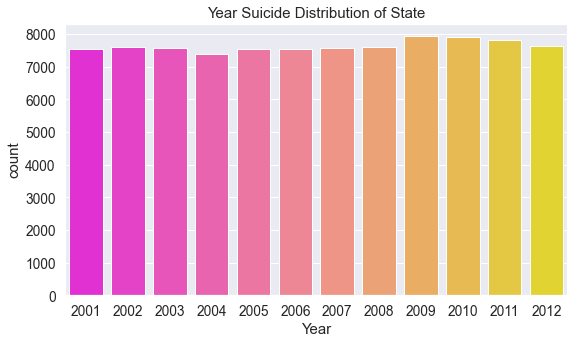

In [41]:
plt.subplots(figsize=(9,5))
sns.countplot(x = "Year", data= df_suicide_state, palette= "spring").set_title("Year Suicide Distribution of State")

Causes                  36104
Means_adopted           26921
Professional_Profile    21002
Education_Status         4728
Social_Status            2939
Name: Type_code, dtype: int64


Text(0.5, 1.0, 'Type-Code Distribution of State')

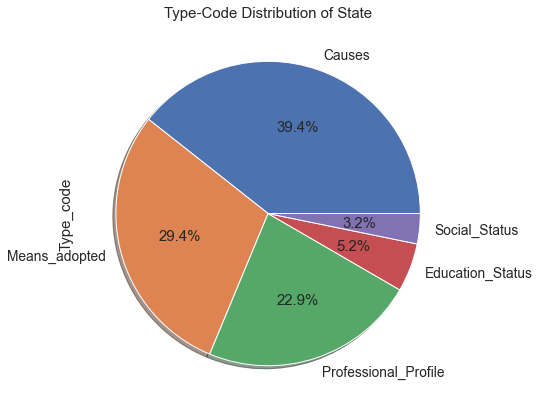

In [42]:
print(df_suicide_state.Type_code.value_counts())
df_suicide_state.Type_code.value_counts().plot(kind= "pie", autopct='%1.1f%%', shadow=True, figsize=(7,7))
plt.title("Type-Code Distribution of State")

Text(0.5, 1.0, "Type:'Causes' for Suicide in State")

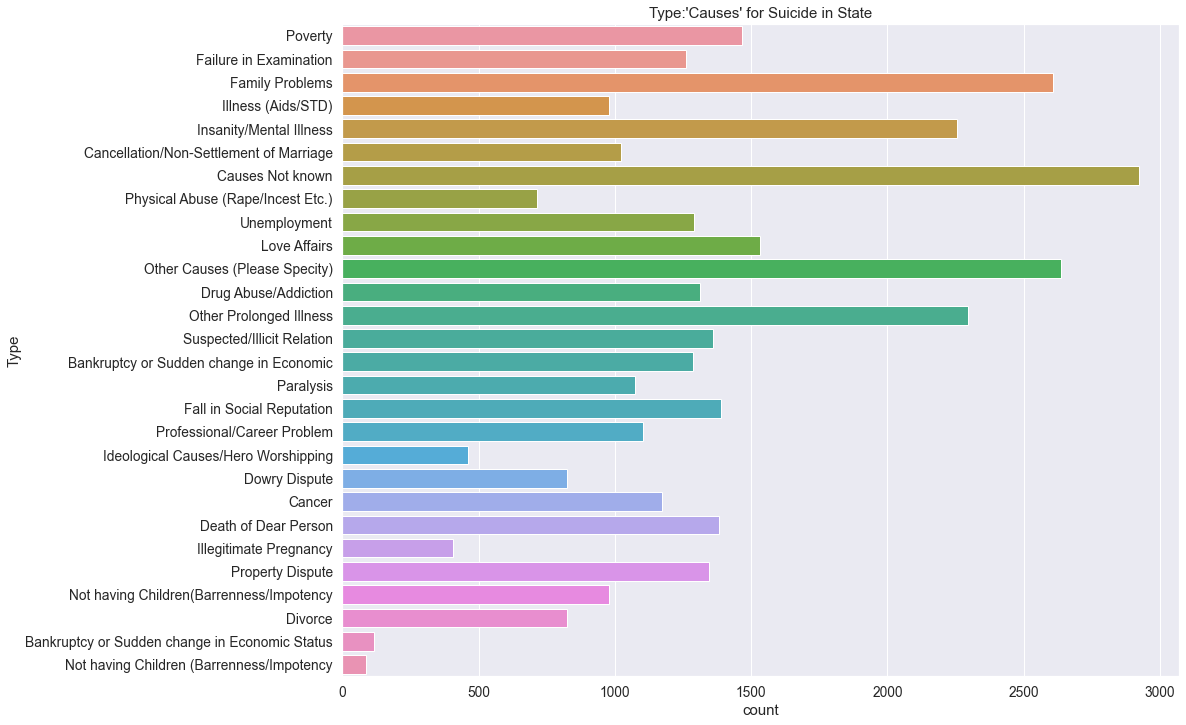

In [43]:
df_suicide_state_causes = df_suicide_state.loc[df_suicide_state["Type_code"]=='Causes']
plt.subplots(figsize=(15,12))
sns.countplot(y = "Type", data= df_suicide_state_causes).set_title("Type:'Causes' for Suicide in State")

Text(0.5, 1.0, "Type:'Means_adopted' for Suicide in State")

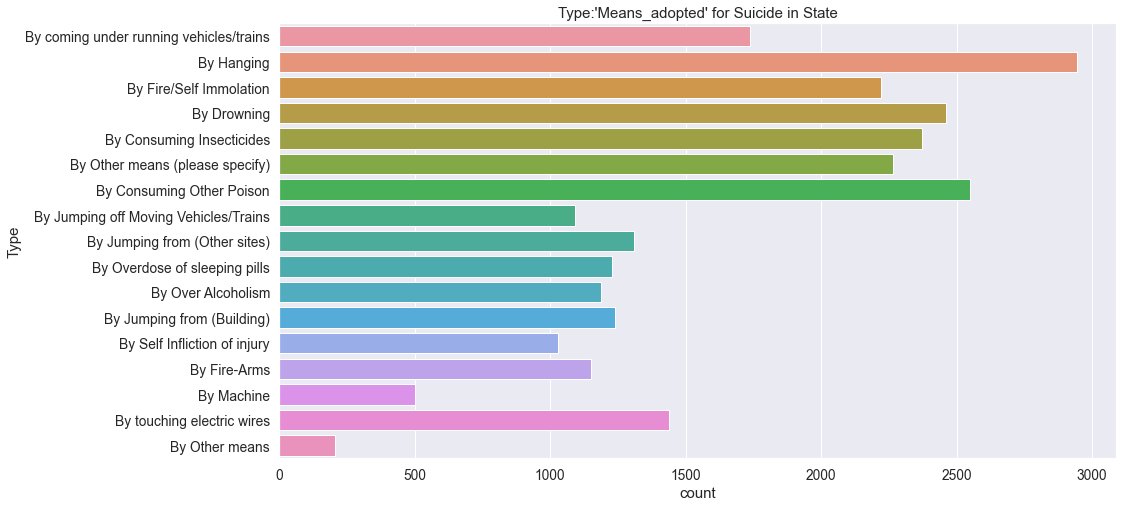

In [44]:
df_suicide_state_causes = df_suicide_state.loc[df_suicide_state["Type_code"]=='Means_adopted']
plt.subplots(figsize=(15,8))
sns.countplot(y = "Type", data= df_suicide_state_causes).set_title("Type:'Means_adopted' for Suicide in State")

Text(0.5, 1.0, "Type: 'Social_Status' for Suicide in State")

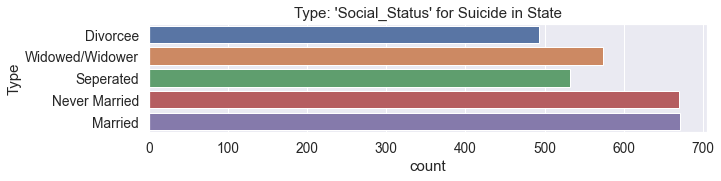

In [45]:
df_suicide_state_causes = df_suicide_state.loc[df_suicide_state["Type_code"]=='Social_Status']
plt.subplots(figsize=(10,2))
sns.countplot(y = "Type", data= df_suicide_state_causes).set_title("Type: 'Social_Status' for Suicide in State")

Text(0.5, 1.0, "Type: 'Education_Status' for Suicide in State")

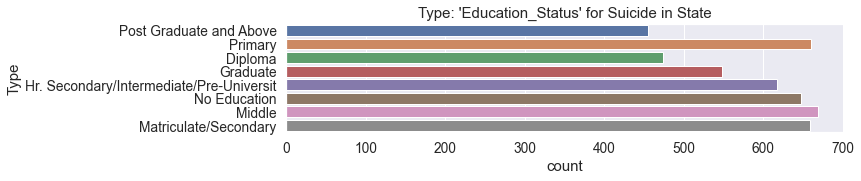

In [46]:
df_suicide_state_causes = df_suicide_state.loc[df_suicide_state["Type_code"]=='Education_Status']
plt.subplots(figsize=(10,2))
sns.countplot(y = "Type", data= df_suicide_state_causes).set_title("Type: 'Education_Status' for Suicide in State")

Text(0.5, 1.0, "Type:'Professional_Profile' for Suicide in State")

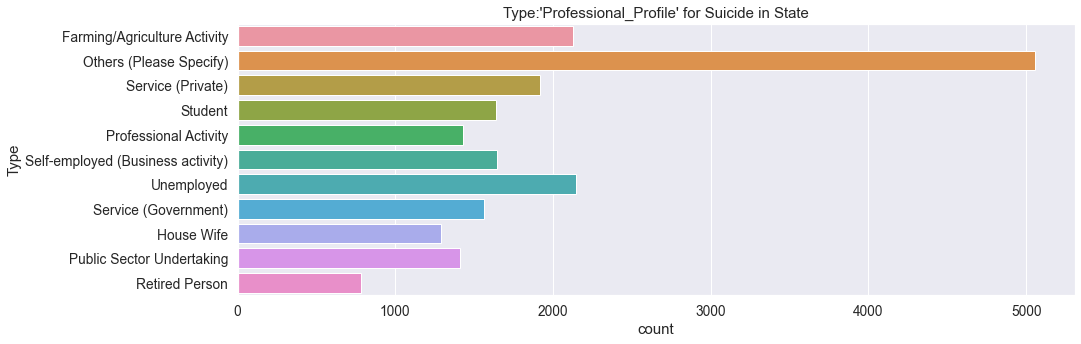

In [47]:
df_suicide_state_causes = df_suicide_state.loc[df_suicide_state["Type_code"]=='Professional_Profile']
plt.subplots(figsize=(15,5))
sns.countplot(y = "Type", data= df_suicide_state_causes).set_title("Type:'Professional_Profile' for Suicide in State")

In [48]:
df_suicide_ut = df_suicide.loc[df_suicide['State'].isin(["A & N Islands", "Chandigarh", "D & N Haveli", "Daman & Diu", "Delhi (Ut)", "Lakshadweep", "Puducherry"])]

In [49]:
df_suicide_ut.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9416 entries, 13 to 182375
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   State      9416 non-null   object
 1   Year       9416 non-null   int64 
 2   Type_code  9416 non-null   object
 3   Type       9416 non-null   object
 4   Gender     9416 non-null   object
 5   Age_group  9416 non-null   object
 6   Total      9416 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 588.5+ KB


Text(0.5, 1.0, 'Suicide Distribution by UT')

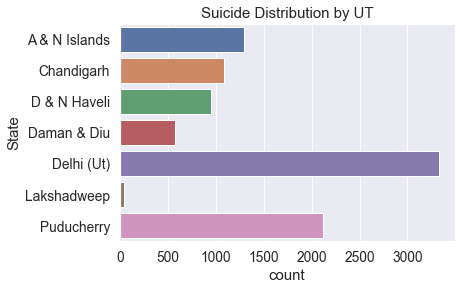

In [50]:
sns.countplot(y= "State",data = df_suicide_ut).set_title("Suicide Distribution by UT")

Text(0.5, 1.0, 'Gender Suicide Distribution by UT')

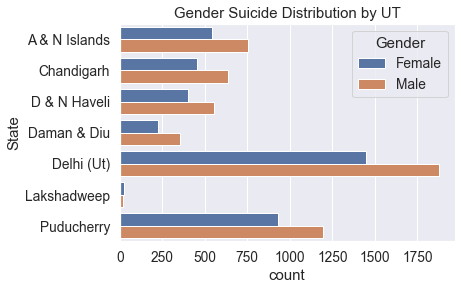

In [51]:
sns.countplot(y= "State", hue= "Gender" ,data = df_suicide_ut).set_title("Gender Suicide Distribution by UT")

Text(0.5, 1.0, 'UT Suicide Distribution by Age-Group')

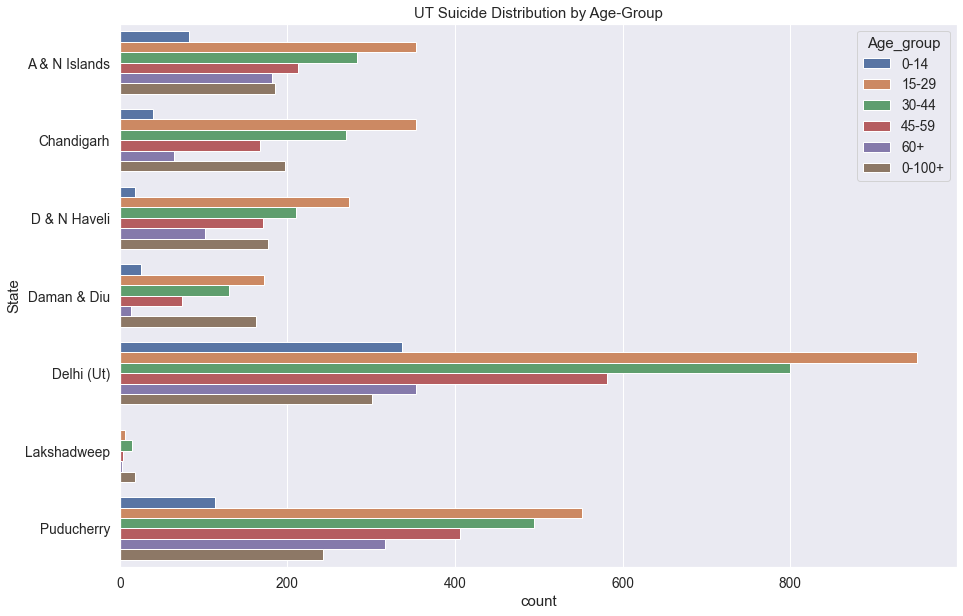

In [52]:
plt.subplots(figsize=(15,10))
sns.countplot(y= "State", hue= "Age_group" ,data = df_suicide_ut).set_title("UT Suicide Distribution by Age-Group")

Male      5387
Female    4029
Name: Gender, dtype: int64


Text(0.5, 1.0, 'Gender Suicide Distribution of UT')

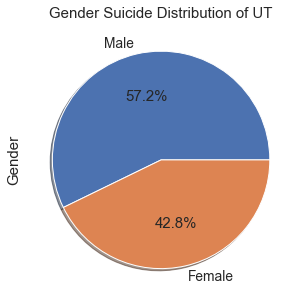

In [53]:
print(df_suicide_ut.Gender.value_counts())
df_suicide_ut.Gender.value_counts().plot(kind= "pie", autopct='%1.1f%%', shadow=True, figsize=(5,5))
plt.title("Gender Suicide Distribution of UT")

Text(0.5, 1.0, 'Gender Suicide Distribution of UT by Age-Group')

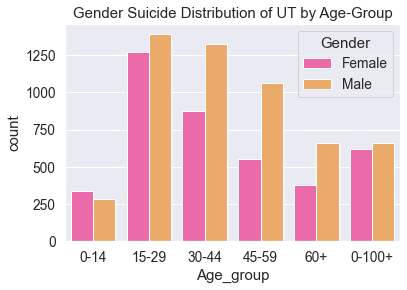

In [54]:
sns.countplot(x = "Age_group", hue= "Gender", data= df_suicide_ut, palette= "spring").set_title("Gender Suicide Distribution of UT by Age-Group")

Text(0.5, 1.0, 'Year Suicide Distribution of UT')

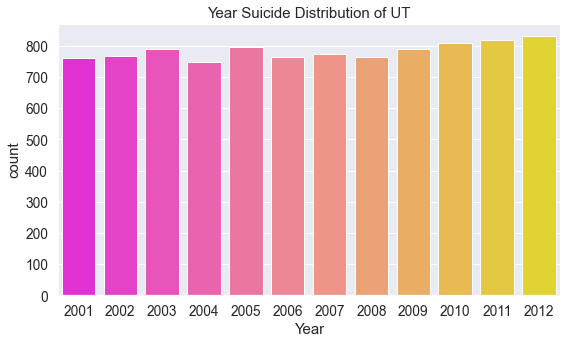

In [55]:
plt.subplots(figsize=(9,5))
sns.countplot(x = "Year", data= df_suicide_ut, palette= "spring").set_title("Year Suicide Distribution of UT")

Causes                  3427
Means_adopted           2416
Professional_Profile    2289
Education_Status         874
Social_Status            410
Name: Type_code, dtype: int64


Text(0.5, 1.0, 'Type-Code Distribution of UT')

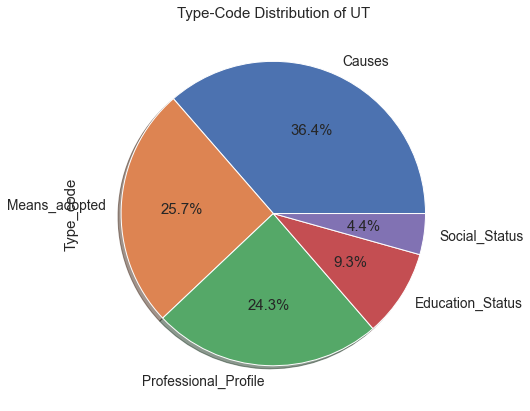

In [56]:
print(df_suicide_ut.Type_code.value_counts())
df_suicide_ut.Type_code.value_counts().plot(kind= "pie", autopct='%1.1f%%', shadow=True, figsize=(7,7))
plt.title("Type-Code Distribution of UT")

Text(0.5, 1.0, "Type:'Causes' for Suicide in UT")

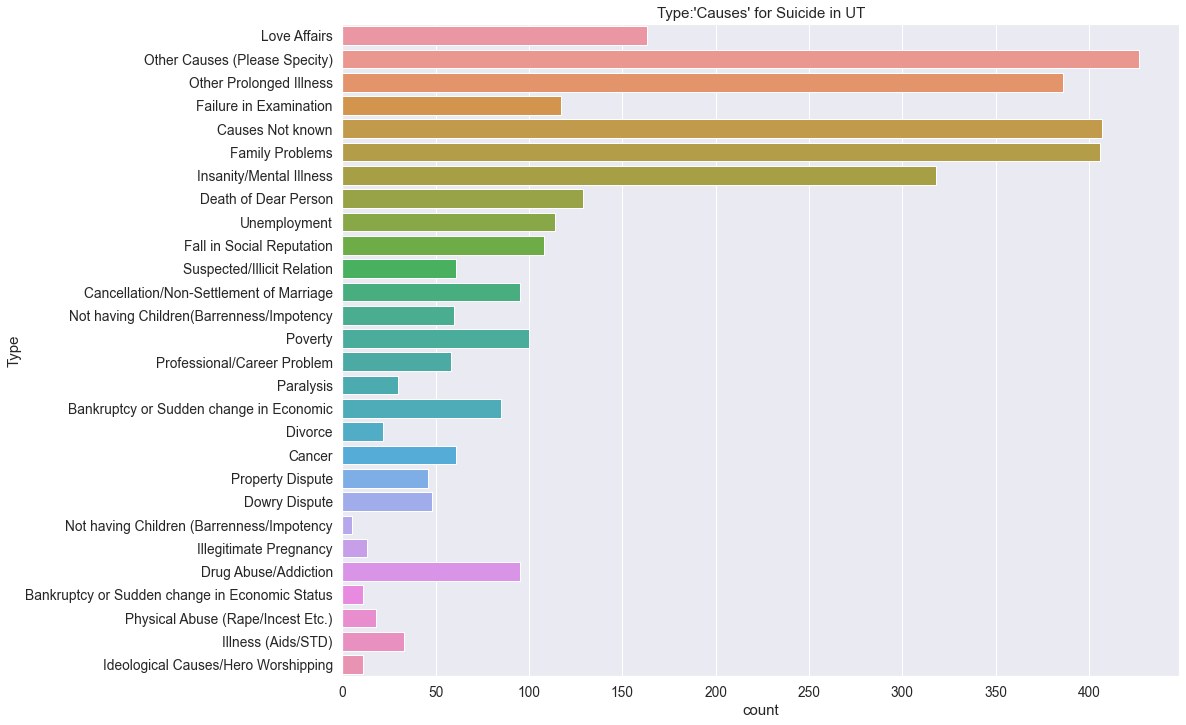

In [57]:
df_suicide_ut_causes = df_suicide_ut.loc[df_suicide_ut["Type_code"]=='Causes']
plt.subplots(figsize=(15,12))
sns.countplot(y = "Type", data= df_suicide_ut_causes).set_title("Type:'Causes' for Suicide in UT")

Text(0.5, 1.0, "Type:'Means_adopted' for Suicide in UT")

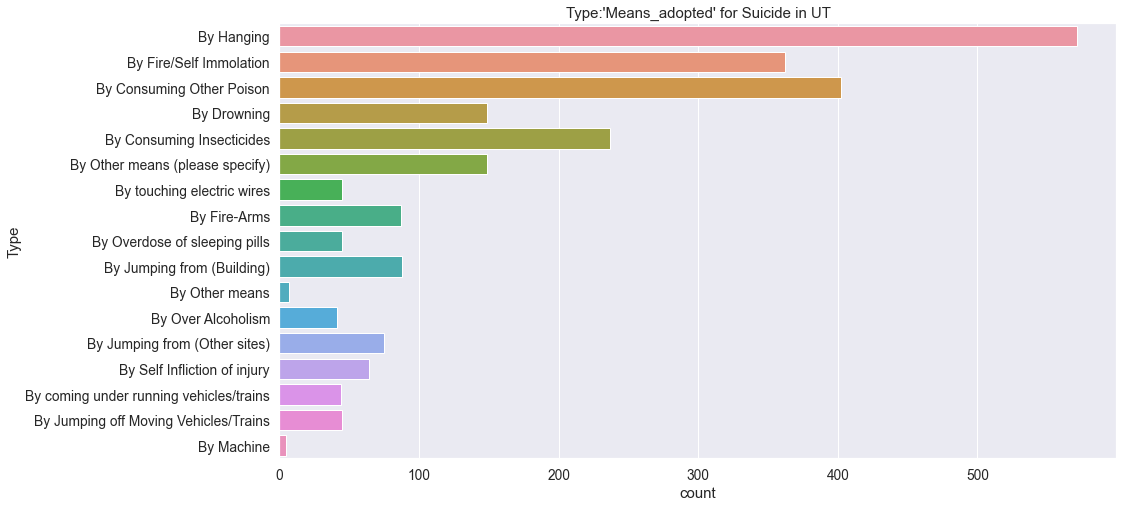

In [58]:
df_suicide_ut_causes = df_suicide_ut.loc[df_suicide_ut["Type_code"]=='Means_adopted']
plt.subplots(figsize=(15,8))
sns.countplot(y = "Type", data= df_suicide_ut_causes).set_title("Type:'Means_adopted' for Suicide in UT")

Text(0.5, 1.0, "Type: 'Social_Status' for Suicide in UT")

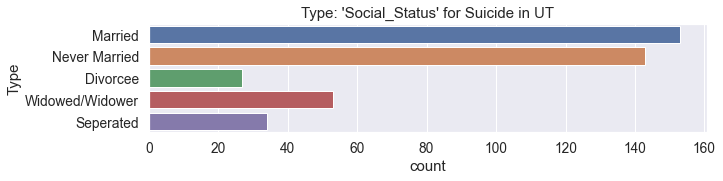

In [59]:
df_suicide_ut_causes = df_suicide_ut.loc[df_suicide_ut["Type_code"]=='Social_Status']
plt.subplots(figsize=(10,2))
sns.countplot(y = "Type", data= df_suicide_ut_causes).set_title("Type: 'Social_Status' for Suicide in UT")

Text(0.5, 1.0, "Type: 'Education_Status' for Suicide in UT")

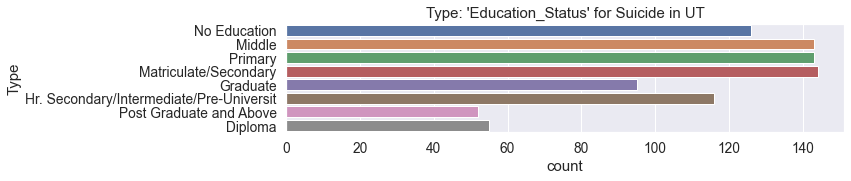

In [60]:
df_suicide_ut_causes = df_suicide_ut.loc[df_suicide_ut["Type_code"]=='Education_Status']
plt.subplots(figsize=(10,2))
sns.countplot(y = "Type", data= df_suicide_ut_causes).set_title("Type: 'Education_Status' for Suicide in UT")

Text(0.5, 1.0, "Type:'Professional_Profile' for Suicide in UT")

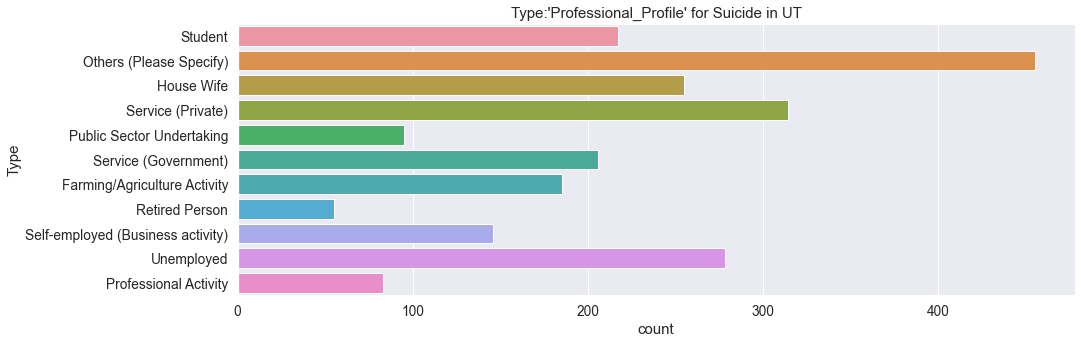

In [61]:
df_suicide_ut_causes = df_suicide_ut.loc[df_suicide_ut["Type_code"]=='Professional_Profile']
plt.subplots(figsize=(15,5))
sns.countplot(y = "Type", data= df_suicide_ut_causes).set_title("Type:'Professional_Profile' for Suicide in UT")